# Uncertainty amplification

Let's see what happens when we introduce error into our data.

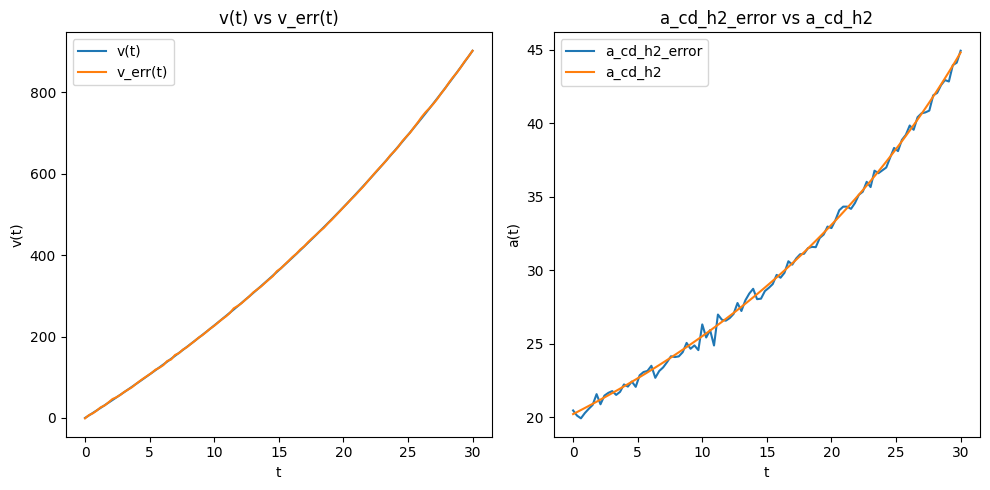

In [ ]:
# prompt: Plot beside v and v_err and another plot with a_cd_h2_error and a_cd_h2  beside eachother

def v_err(t):
  return v(t)+np.random.normal(0,1, len(t))

a_cd_h2_error = central_difference(v_err, t, h=2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))


# Plot v and v_err
axes[0].plot(t, v(t), label='v(t)')
axes[0].plot(t, v_err(t), label='v_err(t)')
axes[0].set_xlabel('t')
axes[0].set_ylabel('v(t)')
axes[0].set_title('v(t) vs v_err(t)')
axes[0].legend()


# Plot a_cd_h2_error and a_cd_h2
axes[1].plot(t, a_cd_h2_error, label='a_cd_h2_error')
axes[1].plot(t, a_cd_h2, label='a_cd_h2')
axes[1].set_xlabel('t')
axes[1].set_ylabel('a(t)')
axes[1].set_title('a_cd_h2_error vs a_cd_h2')
axes[1].legend()

plt.tight_layout()
plt.show()

Yikes! This is because differentiation tends to *amplify* error.

Consider a Fourier analysis of the signal and you'll see that the noise has a period on the order of the order of the sampling distance (which is much higher frequency than the signal). This means the noise has a much larger derivative!



<ipython-input-15-8f59ff1ddeb7>:11: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/frequencies, np.abs(fft_result))


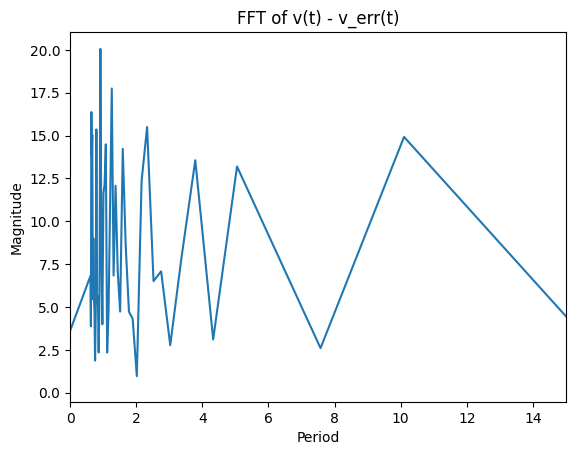

In [ ]:
# prompt: show the fft of v(t)-v_err(t) and show in period

# Calculate the difference between v(t) and v_err(t)
difference = v(t) - v_err(t)

# Perform FFT
fft_result = np.fft.fft(difference)
frequencies = np.fft.fftfreq(len(difference), d=(t[1]-t[0]))

# Plot the FFT in terms of period
plt.plot(1/frequencies, np.abs(fft_result))
plt.xlabel('Period')
plt.ylabel('Magnitude')
plt.title('FFT of v(t) - v_err(t)')
plt.xlim(0, 15)  # Adjust x-axis limits as needed
plt.show()

With this in mind, there are several options:
* Prefilter the data: Apply a moving average, or low-pass filter to reduce high-frequency noise
* Regularization of the derivative: By requiring smoothness of the derivative, we can *damp* out frenetic behaviour.
* Savitzky-Golay Filter: Use linear least squares to fit a low-degree polynomial to successive windows and take that derivative
* integrate instead.

Just as derivation amplifies noise, integration tends to smooth it. So a common approach is to integrate a noisy signal and fit the integral to some expected form.